# OpenCV. РОБОТА із ЗОБРАЖЕННЯМИ
## Файл: CV_Image_01_001

### Створення / завантаження зображень
### Геометричні перетворення

In [3]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt # this lets you draw inline pictures in the notebooks
import skimage.io as io
plt.rcParams['font.size'] = 10

In [4]:
import cv2 as cv
print (cv.__version__)

4.10.0


#### Читання зображення з файлу

In [5]:
# Read an image from the disk
filename = './IMAGES/Lenna.png' 
test_im = cv.imread(filename)

In [6]:
print('IMAGE SHAPE', test_im.shape)
print('DATA Type',test_im.dtype)
print('IMAGE SIZE',test_im.size)

IMAGE SHAPE (512, 512, 3)
DATA Type uint8
IMAGE SIZE 786432


#### Display the image in a window !!! with CV

In [7]:
# Wait for a key press and close the window
while True:
    cv.imshow('Display window', test_im)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()


#### Display the image in a window !!! with MATPLOTLIB

Важливо ! OpenCV використовує не RGB формат, а BGR формат


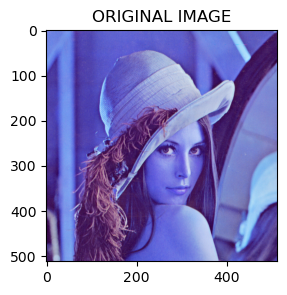

In [8]:
print('Важливо ! OpenCV використовує не RGB формат, а BGR формат')
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

#### Для виводу файлов OpenCV за допомогою Matplotlib необхідно зображення переформувати в RGB

DATA Type uint8


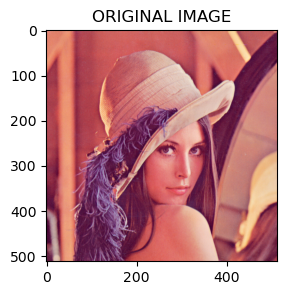

In [41]:
# Convert the image from BGR to RGB
rgb_test_im = cv.cvtColor(test_im, cv.COLOR_BGR2RGB)
print('DATA Type',rgb_test_im.dtype)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('ORIGINAL IMAGE')
plt.imshow(rgb_test_im)
plt.show()

#### Перетворення до ахроматичного (сірого)

In [10]:
gray_test_im = cv.cvtColor(test_im, cv.COLOR_BGR2GRAY)
while True:
    cv.imshow('Display window', gray_test_im)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()


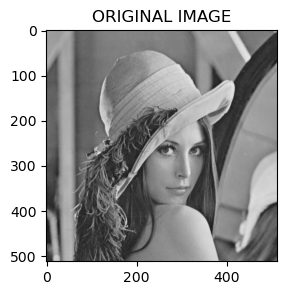

In [11]:
gray_test_im = cv.cvtColor(test_im, cv.COLOR_BGR2GRAY)
rgb_gray_test_im = cv.cvtColor(gray_test_im, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('ORIGINAL IMAGE')
plt.imshow(rgb_gray_test_im )
plt.show()

# Геометричні перетворення в OpenCV
SEE: [Geometric Image Transformations](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html)

Open CV надає низку функцій, які виконують різноманітні геометричні перетворення двовимірних зображень. Вони не змінюють вміст зображення, але деформують піксельну сітку та відображають цю деформовану сітку на цільове зображення. Фактично, щоб уникнути артефактів вибірки, відображення виконується у зворотному порядку, від місця призначення до джерела. Тобто для кожного пікселя $(x, y)$ **цільового зображення** $dst$ функції обчислюють координати відповідного **«донорського»** пікселя у вихідному зображенні $src$  та копіюють значення пікселя:

$$dst(x,y) = src(f_x(x,y), f_y(x,y))$$





У випадку, коли ви вказуєте пряме відображ $<g_x,g_y>:src->dst$  функції ції OpenCV спочатку обчислюють відповідне зворотне відображе$left<f_x,ig ttt->ttt$src}, а потім використайте наведену  формулу. у.

Реальна реалізація геомет перетворень, від найзагальнішого **remap()** map() і до найпростішого та найшви**дшого re**ize() , потребує вирішення двох основних проблем за допомогою наведеної вище ф.рм- **ули:

Екстраполяція неіснуючих .** Дзділі, для деяких (x,y) одна з f_x(x,y) або f_y(x,y) або обидві можуть опинитися за межами зображення. У цьому випадку необхідно використовувати метод екстраполяції. OpenCидеякі й виби методів екстр.ьтрації. Кріно, втьсяін надає метод BORDER_TRA, щоRENT. Це означає, що відповідні пікселі в цільовому зображенні взагалі не будуть з
- **мінені.
Інтерполяція значень **пікселів. Зазвичай f_x(x,y) і f_y(x,y) є числами з плаваючою комою. Це озн<що \left>_y\right> може бути або афінним, або перспективним перетворенням, або радіальною корекцією спотворення лінзи тощо. Отже, значенняпотрібно отримати  пікселя в дробових ко отримати. У найпростішому випадку координати можна просто округлити до найближчих цілих координат і використати відповідний піксель. Це називається інтерполяцією найближчого сусіда. Однак кращого результату можна досягти, використовуючи складніші методи інтерполяції, де поліноміальна функція вписується в деяку околицю обчисленого пікселя (f_x(x,y), f_y(x,y)), а потім значення поліном при (f_x(x,y), f_y(x,y)) береться як інтерпольоване піксельне значення. У OpenCV ви можете вибрати між кількома методами інте деталей.

Можна використвувати різні методи інтерполяції:

- **cv2.INTER_LINEAR** (за замовчуванням): Білінійна інтерполяція.
- **cv2.INTER_NEAREST**: Найближчий піксель.
- **cv2.INTER_AREA**: Окіл пікселю.
- **cv2.INTER_CUBIC**: Кубічна інтрполяція.
- **cv2.INTER_LANCZOS4**: 8x8 окіл пікселю для інтерполяці. Найвща якість.

#### Фцнкція resize ()
**call**

cv.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst¶

#### Приклад зміни розміру. 

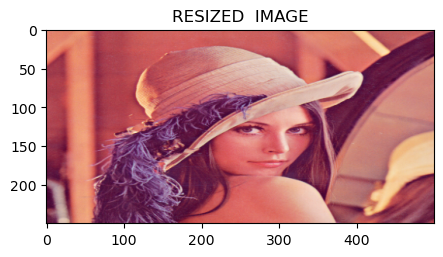

In [30]:
resized_img = cv.resize(test_im, (500, 250))
rgb_resized_img = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('RESIZED  IMAGE')
plt.imshow(rgb_resized_img)
plt.show()

#### Приклад використання інтерполяції

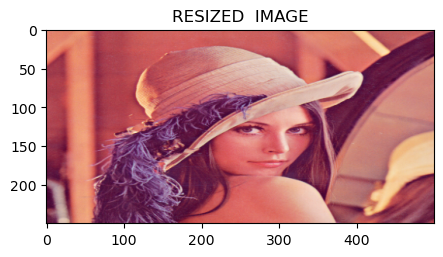

In [13]:
resized_img_ = cv.resize(test_im, (500, 250), cv.INTER_LANCZOS4)
rgb_resized_img_ = cv.cvtColor(resized_img_, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('RESIZED  IMAGE')
plt.imshow(rgb_resized_img_)
plt.show()

# Змішування зображень
SEE: [Operations on Arrays](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?highlight=addweighted#cv2.addWeighted)

Для змішування двох зображень використовується функція обчислення зваженої суми двох масивів (зображень)

cv.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) → dst

Параметри:	

- **src1** – перше зображення.
- **alpha** – вага першого зображення.
- **src2** – друге зображення (розмір повинен співпадати з src1).
- **beta** – вага другого зображення.
- **dst** – нове зображення (розмір повинен співпадати з src1).
- **gamma** – скляр що додається до кожної суми.
- **dtype** – опціонально: глибина масиву. Якщо вхідні масиви мають однакову глибину, dtype можна встановити -1, що еквівалентно src1.depth().



Функція addWeighted обчислює за наступним виразом:

$$ dst(I)= {src1} (I)* alpha +  {src2} (I)*beta +  gamma$$

In [35]:
# Read an image from the disk
filename = './IMAGES/Face_1_.jpg' 
test_im2 = cv.imread(filename)
print('IMAGE2 SHAPE', test_im2.shape)
print('DATA2 Type',test_im2.dtype)
print('IMAGE2 SIZE',test_im2.size)

IMAGE2 SHAPE (400, 300, 3)
DATA2 Type uint8
IMAGE2 SIZE 360000


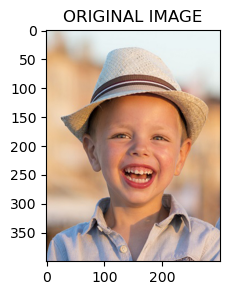

In [33]:
rgb_test_img2 = cv.cvtColor(test_im2, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('ORIGINAL IMAGE')
plt.imshow(rgb_test_img2)
plt.show()

IMAGE SHAPE (512, 512, 3)


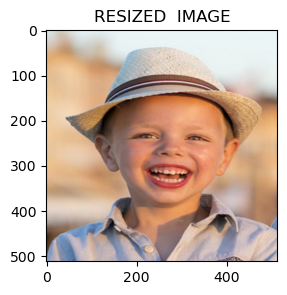

In [44]:
# Ресайз другого зображення
resized_img_2 = cv.resize(test_im2, (512, 512), cv.INTER_LANCZOS4)
rgb_resized_img_2 = cv.cvtColor(resized_img_2, cv.COLOR_BGR2RGB)
print('IMAGE SHAPE', rgb_resized_img_2.shape)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('RESIZED  IMAGE')
plt.imshow(rgb_resized_img_2)
plt.show()

In [54]:
# Змішуємо
alpha = 0.5
beta = 1.0-alfa
gamma = 0 
rgb_mix_image = cv.addWeighted(rgb_test_im, alpha, rgb_resized_img_2, beta, gamma, dst=-1)

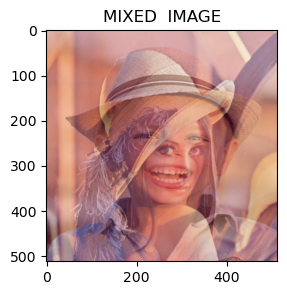

In [55]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('MIXED  IMAGE')
plt.imshow(rgb_mix_image)
plt.show()

## Афінне переторення

Загальні геометричні перетворення виконуються за допомогою **warpAffine()** , що застосовує афінне перетворення до вихідного зображення.

cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst¶

Параметри:	

- **src** – вихідне зображення.

- **dst** – перетворене зображення, що має розмір dsize той же що src.

- **M** – 2 х 3 матриця перетворення.

- **dsize** – розмір перетвореного зображення.

- **flags** – комбінація методу інтерполяції (see resize()) та опціонального флагу WARP_INVERSE_MAP, що означає, що матриця M є інверсною матрицею перетворення.

- **borderMode** – метод екстраполяції

- **borderValue** – значення, що використовується в випадку константного значення (за замовчування 0).

Функція перетворює src за наступним виразом:


$$dst(x,y) = src ({M} _{11} x + {M} _{12} y + {M} _{13}, {M} _{21} x +  {M} _{22} y + {M} _{23})$$


де флаг WARP_INVERSE_MAP встановлено.  В зворотному випадку, спочатку виконується інверсне афінне перетворення.



Матриця двовимірного обертання обчислюється за допосогою

сv.getRotationMatrix2D(center, angle, scale) 

Параметри:

- **center** – центр обертання
- **angle** – кут обертання (градуси)
- **scale** – коефіцієнт масштабування
- **map_matrix** – вихідне афінне перетворення, матриця з плаваючою комою 2x3.



Функція обчислює таку матрицю:

$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot \texttt{center.x} - \beta \cdot \texttt{center.y} \\ - \beta & \alpha & \beta \cdot \texttt{center.x} + (1- \alpha ) \cdot \texttt{center.y} \end{bmatrix}$$

де

$$\begin{array}{l} \alpha = \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta = \texttt{scale} \cdot \sin \texttt{angle} \end{array}$$



Прикад обертання зображення на визначений кут 

In [56]:
# dividing height and width by 2 to get the center of the image
height, width = test_im.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
 
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=30, scale=0.5)
 
# rotate the image using cv2.warpAffine
rotated_image = cv.warpAffine(src=test_im, M=rotate_matrix, dsize=(width, height))

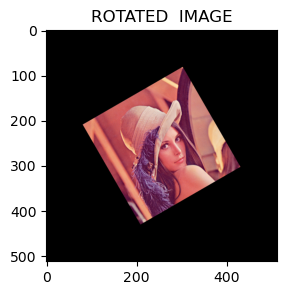

In [57]:
rgb_rotated_img = cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(5, 3))
plt.title('ROTATED  IMAGE')
plt.imshow(rgb_rotated_img)
plt.show()